In [4]:
import pandas as pd
import re

df = pd.read_excel("data/appliedAI_Use Case Library - Risk Class_TUM.ai.xlsx", index_col=None, header=2)
df_gen = pd.read_csv("data/generated_ideas (2).csv")

with open("data/AI_Act_Annex_III_+_Amendments_of_April_2022_for_Use_Case_Library.txt") as f:
    annex_file = f.read()
   
with open("data/untitled.txt") as f:
    annex_file = f.read()

with open("data/gpt_me.txt") as f:
    moritz_file = f.read()

In [5]:
moritz_file.split("\n\n")

['Common challenges for production teams are an increase in product variations, shorter cycle times, high quality standards, hard competition and a general cost pressure. In this context, AI can help increase productivity and to free employees: to free the inside of recurring tasks. The integration of AI systems in the production control and monitoring enables the constant analysis of data from the shoplors, which the system then uses to make intelligent adjustments to the function parameters of the physical resources. The aim is to automatically control these physical resources and optimize your parameters with regard to working conditions.',
 '\nThe AI is used to navigate airplanes when approaching airports. This shall\nprevent aircrafts from crashing without human supervision. The AI takes into\naccount the characteristics of the airplane, weather data as well as the\nlocation of all planes nearby. This AI can be used by airports who want to\nincrease security in the air.',
 'The AI

In [6]:
def parse_numbered(text):
    mapp = dict()
    activate= False
    num = None
    for txt in re.split("\n([0-9])\.", text):
        if txt.isdigit():
            activate = True
            num = int(txt)
        elif activate:
            mapp[num] = txt
            activate= False
    end = text.split("8a")[1]
    mapp[9], mapp[10] = re.split("\([a-b]\)", end)[1:]
    mapp[8] = mapp[8].split("8a")[0]
    mapp[10] = mapp[10].split("Version")[0]
    
#     for key in mapp:
        
    return pd.DataFrame(pd.Series(mapp.values()))
# df_annex = parse_numbered(annex_file)
df_moritz = pd.DataFrame(pd.Series(moritz_file.split("\n\n")))

In [7]:
laws = annex_file.split("\n\n")

In [8]:
detailed = []
for law in laws:
    for x in law.split("\n")[1:]:
        detailed.append(law.split("\n")[0] + x)

In [9]:
df_annex = pd.DataFrame(pd.Series(detailed))


In [10]:
for i, row in df_annex.iterrows():
    print(i)
    print(row.item())
    print()

0
Biometric identificationAI systems intended to be used for the ‘real-time’ and ‘post’ remote biometric identification of natural persons.

1
Categorisation of natural persons:AI systems intended to be used for the ‘real-time’ and ‘post’ remote biometric identification of natural persons.

2
Management and operation of critical infrastructure:AI systems intended to be used as safety or security components of management and operation of road traffic and the supply of water, gas, heating, electricity and internet.

3
Education and vocational training:AI systems intended to be used for the purpose of determining access or assigning natural persons to educational and vocational training institutions;

4
Education and vocational training:AI systems intended to be used for the purpose of assessing students in educational and vocational training institutions and for assessing participants in tests commonly required for admission to educational institutions, for determining learning objective

In [11]:
!pwd

/auto/brno2/home/xstary1/brno6/tumai-makeathon22/research/michal


In [12]:
df["risk"] = df["Is the AI System high-risk or low risk?"]
df["name"]  = df["Use case name EN"]
df["desc"] = df["Description"]
df["bus_ch"] = df["Business Challenge"] 
df["system"] = df["AI System"]

df = df.fillna("")


In [13]:
df_gen["description"] = df_gen["description"].apply(lambda x: x.strip())

In [14]:
df_gen["tags"].unique()

array(['biometric identification', 'categorisation of people',
       'management of critical infrastructure',
       'operation of critical infrastructure',
       'education test evaluation', 'vocational test evaluation',
       'worker evaluation', 'work evaluationworkers management',
       'work management', 'human resources services',
       'access to self-employment', 'manage access to venues',
       'manage access from the government',
       'manage access to public goods', 'credit scoring',
       'police suspects', 'help with migration legal process',
       'help with asylum legal process', 'border control management',
       'legal documents generation', 'counting votes', 'counting ballets',
       'decision process in law facilities', 'democratic processes'],
      dtype=object)

In [15]:
df = df[df["risk"] != "It is unclear"]
len(df)

115

In [16]:
df.head()

,Use Case ID,Use Case Name,Use case name EN,Beschreibung,Description,Geschäftsproblem,Business Challenge,KI Lösung,AI System,Links,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,risk,name,desc,bus_ch,system
0,1,Optimierte Stellenangebote,Optimised job offers,Ein zentrales Thema im Einstellungsprozess ist...,A central topic in the setting process is to w...,"Viele Unternehmen tun sich schwer, die richtig...",Many companies find it difficult to win the ri...,Zur Analyse und Optimierung seines Recruiting-...,To analyze and optimize its recruiting materia...,https://www.foundationsofai.com/\n https://tex...,...,,,,,,low-risk,Optimised job offers,A central topic in the setting process is to w...,Many companies find it difficult to win the ri...,To analyze and optimize its recruiting materia...
1,2,Analyse eines Videointerviews,Analysis of a video interview,Während des Rekrutierungsprozesses werden nich...,"During the recruitment process, not only the h...",Das Kundenbetreuungskonzept ist ein zentrales ...,The customer care concept is a central element...,HAPPYCAR hat die KI-Lösung von Retorio zur Ana...,Happycar has integrated Retorio's AI solution ...,https://www.foundationsofai.com/\n https://f.h...,...,,,,,,high-risk,Analysis of a video interview,"During the recruitment process, not only the h...",The customer care concept is a central element...,Happycar has integrated Retorio's AI solution ...
2,3,Vorhersage von Personalfluktuation,Predicting staff turnover,Bestehende Maßnahmen zur Steigerung der Mitarb...,Existing measures to increase employee loyalty...,Die Bindung von Top-Talenten ist ein wichtiger...,The binding of top talents is an important asp...,IBM hat eine KI-Lösung zur Vorhersage von Pers...,IBM has developed a AI solution to predict per...,https://www.foundationsofai.com/\n https://www...,...,,,,,,high-risk,Predicting staff turnover,Existing measures to increase employee loyalty...,The binding of top talents is an important asp...,IBM has developed a AI solution to predict per...
3,4,Leistungsüberwachung / Beobachtung des Mitarbe...,Performance monitoring / observation of employ...,"Engagement-Monitoring-Tools, die auf KI basier...",Engagement monitoring tools based on AI can ex...,Die Bewertung des Mitarbeiterengagements ist i...,The assessment of employee engagement is a cha...,Die KI-Lösung von KeenCorp analysiert kontinui...,The Ki solution from Keencorp continuously ana...,https://www.smartdatacollective.com/ai-driven-...,...,,,,,,high-risk,Performance monitoring / observation of employ...,Engagement monitoring tools based on AI can ex...,The assessment of employee engagement is a cha...,The Ki solution from Keencorp continuously ana...
4,5,Kandidatensuche,Search for candidates,Die am besten geeigneten Kandidat:innen zu fin...,The most suitable candidate: finding inside is...,"Poshmark, ein führendes E-Commerce-Unternehmen...","Poshmark, a leading e-commerce company, wanted...",Poshmark arbeitete mit einem KI-basierten Star...,Poshmark worked with a AI-based startup to str...,https://www.forbes.com/sites/falonfatemi/2019/...,...,,,,,,high-risk,Search for candidates,The most suitable candidate: finding inside is...,"Poshmark, a leading e-commerce company, wanted...",Poshmark worked with a AI-based startup to str...


In [17]:
df = df[df["risk"] != ""]


In [18]:
df["risk"].value_counts()


low-risk     84
high-risk    14
Name: risk, dtype: int64

In [19]:
len(df)
df = df.reset_index()

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df['risk'],
                                                    stratify=df['risk'], 
                                                    test_size=0.30,
                                                   random_state=40)

In [21]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

#Sentences we want to encode. Example:


train_gen = df_gen["description"].to_list() + X_train[X_train["risk"] == "low-risk"]["desc"].to_list()
sentences_gen = train_gen

sentences_cross = df["desc"].to_list()
sentences_train = X_train["desc"].to_list()
sentences_test = X_test["desc"].to_list() + X_train[X_train["risk"] == "high-risk"]["desc"].to_list()
sentences_annex = df_annex[0].to_list()
sentences_moritz = df_moritz[0].to_list()


#Sentences are encoded by calling model.encode()

embeddings_gen = model.encode(sentences_gen)

embeddings_train = model.encode(sentences_train)
embeddings_test = model.encode(sentences_test)
embeddings_cross = model.encode(sentences_cross)

embeddings_annex = model.encode(sentences_annex)
embeddings_moritz = model.encode(sentences_moritz)

In [22]:
sentences_moritz

['Common challenges for production teams are an increase in product variations, shorter cycle times, high quality standards, hard competition and a general cost pressure. In this context, AI can help increase productivity and to free employees: to free the inside of recurring tasks. The integration of AI systems in the production control and monitoring enables the constant analysis of data from the shoplors, which the system then uses to make intelligent adjustments to the function parameters of the physical resources. The aim is to automatically control these physical resources and optimize your parameters with regard to working conditions.',
 '\nThe AI is used to navigate airplanes when approaching airports. This shall\nprevent aircrafts from crashing without human supervision. The AI takes into\naccount the characteristics of the airplane, weather data as well as the\nlocation of all planes nearby. This AI can be used by airports who want to\nincrease security in the air.',
 'The AI

In [23]:
embeddings_annex.shape

(23, 384)

In [24]:
len(df),len(embeddings_cross)

(98, 98)

In [25]:
df.index

RangeIndex(start=0, stop=98, step=1)

/storage/brno2/home/xstary1/brno6/.local-adv.SIF/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/storage/brno2/home/xstary1/brno6/.local-adv.SIF/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


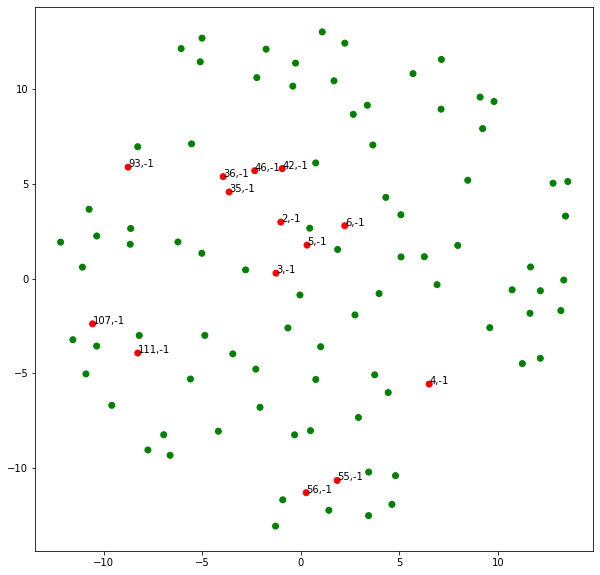

In [26]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

tsne = make_pipeline(StandardScaler(),TSNE(perplexity=30, metric="cosine"))
dbscan = make_pipeline(StandardScaler(), DBSCAN(eps=0.4, min_samples=3, metric="cosine"))


clusters = dbscan.fit_predict(embeddings_cross)
res = tsne.fit_transform(embeddings_cross)

plt.figure(figsize=(10,10))
plt.scatter(x=res[:,0], y=res[:, 1], c=df["risk"].replace({"low-risk": "green", "high-risk": "red"}))
for index, row in df[df["risk"]=="high-risk"].iterrows():
    plt.annotate(str(row[1])+ "," + str(clusters[0]), res[index])
#     print(row[1])
    

In [27]:
res.shape

(98, 2)

In [28]:
pd.Series(clusters).value_counts()

-1    83
 0     6
 1     3
 2     3
 3     3
dtype: int64

In [29]:
embeddings_train.shape

(68, 384)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [31]:
hirisk = embeddings_cross[df[df["risk"] == "high-risk"].index]
lowrisk = embeddings_cross[df[df["risk"] == "low-risk"].index]

In [32]:
hirisk

array([[-0.06679387,  0.01739059,  0.00367336, ...,  0.06424613,
        -0.01493834,  0.01466956],
       [-0.04711025, -0.05883188, -0.01235057, ...,  0.01426129,
         0.00721162,  0.02790828],
       [-0.04783431,  0.00723232,  0.0122018 , ..., -0.03953348,
         0.02966502,  0.01120646],
       ...,
       [ 0.03668308,  0.01549987, -0.04731122, ...,  0.05112401,
         0.00508045,  0.00499014],
       [-0.07315786, -0.00843746, -0.09181997, ..., -0.00313208,
         0.05961251, -0.02156214],
       [-0.03777086, -0.00379693, -0.00740161, ...,  0.02492635,
         0.01026284, -0.03205277]], dtype=float32)

In [33]:
df[df["risk"] == "high-risk"]

,index,Use Case ID,Use Case Name,Use case name EN,Beschreibung,Description,Geschäftsproblem,Business Challenge,KI Lösung,AI System,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,risk,name,desc,bus_ch,system
1,1,2,Analyse eines Videointerviews,Analysis of a video interview,Während des Rekrutierungsprozesses werden nich...,"During the recruitment process, not only the h...",Das Kundenbetreuungskonzept ist ein zentrales ...,The customer care concept is a central element...,HAPPYCAR hat die KI-Lösung von Retorio zur Ana...,Happycar has integrated Retorio's AI solution ...,...,,,,,,high-risk,Analysis of a video interview,"During the recruitment process, not only the h...",The customer care concept is a central element...,Happycar has integrated Retorio's AI solution ...
2,2,3,Vorhersage von Personalfluktuation,Predicting staff turnover,Bestehende Maßnahmen zur Steigerung der Mitarb...,Existing measures to increase employee loyalty...,Die Bindung von Top-Talenten ist ein wichtiger...,The binding of top talents is an important asp...,IBM hat eine KI-Lösung zur Vorhersage von Pers...,IBM has developed a AI solution to predict per...,...,,,,,,high-risk,Predicting staff turnover,Existing measures to increase employee loyalty...,The binding of top talents is an important asp...,IBM has developed a AI solution to predict per...
3,3,4,Leistungsüberwachung / Beobachtung des Mitarbe...,Performance monitoring / observation of employ...,"Engagement-Monitoring-Tools, die auf KI basier...",Engagement monitoring tools based on AI can ex...,Die Bewertung des Mitarbeiterengagements ist i...,The assessment of employee engagement is a cha...,Die KI-Lösung von KeenCorp analysiert kontinui...,The Ki solution from Keencorp continuously ana...,...,,,,,,high-risk,Performance monitoring / observation of employ...,Engagement monitoring tools based on AI can ex...,The assessment of employee engagement is a cha...,The Ki solution from Keencorp continuously ana...
4,4,5,Kandidatensuche,Search for candidates,Die am besten geeigneten Kandidat:innen zu fin...,The most suitable candidate: finding inside is...,"Poshmark, ein führendes E-Commerce-Unternehmen...","Poshmark, a leading e-commerce company, wanted...",Poshmark arbeitete mit einem KI-basierten Star...,Poshmark worked with a AI-based startup to str...,...,,,,,,high-risk,Search for candidates,The most suitable candidate: finding inside is...,"Poshmark, a leading e-commerce company, wanted...",Poshmark worked with a AI-based startup to str...
5,5,6,Stellenausschreibungen,Job advertisements,Ein wichtiger Aspekt des Personalmarketings is...,An important aspect of personnel marketing is ...,Domino’s Pizza ist ein weltweit führender Pizz...,Domino’s pizza is a worldwide leading pizza su...,NRV arbeitete mit einer KI-basierten Plattform...,NRV worked with a AI-based platform for job ad...,...,,,,,,high-risk,Job advertisements,An important aspect of personnel marketing is ...,Domino’s pizza is a worldwide leading pizza su...,NRV worked with a AI-based platform for job ad...
29,34,35,Biometrik / Authentifizierung Beispiel 1,,"Unternehmen können KI so nutzen, dass sie ihre...","Companies can use AI so that they prioritize, ...",Unternehmen sind sich zunehmend des möglichen ...,Companies are increasingly aware of the possib...,Die Sprachüberprüfung erfolgt während des gesa...,The language check takes place throughout the ...,...,,,,,,high-risk,,"Companies can use AI so that they prioritize, ...",Companies are increasingly aware of the possib...,The language check takes place throughout the ...
30,35,36,Biometrik / Authentifizierung Beispiel 2,,"Unternehmen können KI so nutzen, dass sie ihre...","Companies can use AI so that they prioritize, ...",Während des schnellen Wachstums der Online-Ban...,During the rapid growth of the online bank and...,Revolut hat mit einem KI-Lösungsanbieter zusam...,Revolut has worked with a AI solution provider...,...,,,,,,high-risk,,"Companies can use AI so that they prio

In [34]:
lowrisk

array([[-0.03139497,  0.00795051,  0.01129102, ...,  0.05814595,
         0.02363143,  0.03774891],
       [-0.01732959,  0.00484072, -0.01741523, ..., -0.03293433,
         0.02804894,  0.10258891],
       [-0.01787853,  0.00288841,  0.03780749, ...,  0.05298965,
         0.05349929,  0.05609657],
       ...,
       [-0.0209459 , -0.01004866, -0.02454295, ..., -0.03717979,
         0.00335665,  0.04348197],
       [-0.07329359,  0.04801735,  0.02597554, ..., -0.07288679,
        -0.04520556,  0.01757922],
       [-0.07329359,  0.04801735,  0.02597554, ..., -0.07288679,
        -0.04520556,  0.01757922]], dtype=float32)

In [69]:
from numpy import dot
from numpy.linalg import norm
import torch
import scipy.spatial as sp

a = embeddings_annex
b = hirisk
cos_sim = 1 - sp.distance.cdist(a, b, 'cosine')

cos_sim.argmax(0)

ref = [4,4,4,4,4,1,1,1,1,8,8,1,5,5]

In [70]:
cos_sim.max(axis=0)

array([0.44316979, 0.48140311, 0.45115547, 0.4427902 , 0.49519909,
       0.64275061, 0.64275061, 0.38737928, 0.47169647, 0.61225786,
       0.41908579, 0.52549469, 0.54546816, 0.59357179])

In [71]:
cos_sim.argsort(axis=0)[::-1]+1

array([[ 7,  8, 13,  7,  7,  1,  1, 12,  1, 20, 21, 14, 17, 10],
       [ 2,  7,  8,  4,  8,  2,  2, 20, 20, 21,  8, 13, 14, 17],
       [ 4,  5, 17, 19,  4, 20, 20,  1,  2, 15, 20,  3, 16, 20],
       [16,  4, 16,  8, 14, 16, 16, 11, 14, 14, 15, 15, 15, 16],
       [14, 19, 15, 11,  5, 13, 13, 10, 12, 17, 13, 17, 20, 15],
       [ 5,  6,  7, 18, 10, 14, 14,  2, 13,  8, 14, 16, 13,  7],
       [20, 12, 14, 12, 11,  7,  7,  7,  4, 16, 22, 20,  3,  8],
       [15, 11, 20,  5, 20, 17, 17,  9, 16, 13, 16, 19, 10, 11],
       [13, 10, 12,  9, 22, 12, 12, 14, 11,  7, 17, 18, 21, 14],
       [17, 18,  9, 22, 16, 11, 11, 16,  7, 22, 11, 12,  8,  5],
       [ 1,  3, 18, 20,  9,  4,  4, 13, 15,  4,  7,  7, 23, 21],
       [ 6,  9,  2, 16, 17, 10, 10,  3, 10,  3,  9, 22,  7, 13],
       [18, 22, 11, 17, 12, 15, 15,  4,  5, 11,  4,  4, 22,  4],
       [21, 20, 22, 10,  3,  9,  9, 19,  9,  6, 12,  5,  2,  3],
       [ 8, 15, 21, 21, 21,  5,  5, 15,  6, 10, 10, 21,  5, 12],
       [22, 14,  4, 13,  

In [72]:
cos_sim.max(axis=0) >0.43, (cos_sim.argsort(axis=0)[::-1]+1)[0], ref

(array([ True,  True,  True,  True,  True,  True,  True, False,  True,
         True, False,  True,  True,  True]),
 array([ 7,  8, 13,  7,  7,  1,  1, 12,  1, 20, 21, 14, 17, 10]),
 [4, 4, 4, 4, 4, 1, 1, 1, 1, 8, 8, 1, 5, 5])

In [73]:
cos_sim.max(axis=0)

array([0.44316979, 0.48140311, 0.45115547, 0.4427902 , 0.49519909,
       0.64275061, 0.64275061, 0.38737928, 0.47169647, 0.61225786,
       0.41908579, 0.52549469, 0.54546816, 0.59357179])

In [74]:
a = embeddings_annex
b = lowrisk
cos_sim = 1 - sp.distance.cdist(a, b, 'cosine')
cos_sim.argmax(0)
cos_sim.max(axis=0) > 0.43

array([ True,  True,  True, False,  True, False, False, False,  True,
        True, False, False, False,  True,  True, False,  True, False,
       False,  True, False, False, False, False,  True,  True, False,
       False, False,  True,  True, False,  True,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True, False, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
       False, False, False])

In [79]:
a = embeddings_annex
b = embeddings_moritz
cos_sim = 1 - sp.distance.cdist(a, b, 'cosine')
cos_sim.argmax(0)
ref = np.arange(1,11)
cos_sim.argsort(axis=0)[::-1]+1

array([[ 3,  3,  5,  7, 10, 17, 19, 21, 12, 20],
       [ 8, 17, 20,  8,  9, 15, 18, 17,  7, 16],
       [ 7, 20,  7, 19, 20, 16, 20, 15, 14, 17],
       [ 5, 12,  6,  4, 11, 13,  7, 16, 20, 10],
       [17, 13,  4, 18, 12, 14, 17, 13,  3,  2],
       [ 4,  7, 15, 20, 17, 20, 11, 22,  8, 14],
       [ 6, 19, 13,  5,  7,  3,  9, 20, 21, 15],
       [21, 14, 10, 11, 19, 21, 12, 14, 17, 19],
       [12, 15, 19, 17, 16, 19,  4, 23, 11, 13],
       [15, 16, 17, 12,  3, 18, 16,  7,  9,  1],
       [22, 18, 16,  6, 18, 22, 22, 10, 23,  7],
       [16,  6, 12, 15, 15, 12, 10, 18, 10, 18],
       [20, 21, 18, 16, 13,  7, 14, 19, 22,  9],
       [14, 22, 14, 22,  4, 23, 13, 12, 13,  4],
       [11,  4, 21,  3, 14, 10, 15,  8,  6, 22],
       [10,  5, 22,  9, 22,  8,  5,  3, 15, 12],
       [13, 11,  8, 13, 21,  4,  6,  6, 18, 11],
       [23,  8,  9, 21,  8, 11, 21,  9, 19, 21],
       [ 9, 10, 11, 10,  5,  5, 23,  4, 16,  3],
       [19,  9,  3,  2, 23,  9,  3, 11,  5,  6],
       [18, 23, 23, 

In [80]:
sentences_moritz

['Common challenges for production teams are an increase in product variations, shorter cycle times, high quality standards, hard competition and a general cost pressure. In this context, AI can help increase productivity and to free employees: to free the inside of recurring tasks. The integration of AI systems in the production control and monitoring enables the constant analysis of data from the shoplors, which the system then uses to make intelligent adjustments to the function parameters of the physical resources. The aim is to automatically control these physical resources and optimize your parameters with regard to working conditions.',
 '\nThe AI is used to navigate airplanes when approaching airports. This shall\nprevent aircrafts from crashing without human supervision. The AI takes into\naccount the characteristics of the airplane, weather data as well as the\nlocation of all planes nearby. This AI can be used by airports who want to\nincrease security in the air.',
 'The AI

In [81]:
cos_sim.max(axis=0) > 0.43

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True])

In [82]:
cos_sim.argmax(axis=0)+1  ==ref

array([False, False, False, False, False, False, False, False, False,
       False])

In [83]:
knn = KNeighborsClassifier(n_neighbors=3)

In [84]:
train_gen_y = df_gen["tags"].to_list() + ["low-risk" for _ in range(len(X_train[X_train["risk"] == "low-risk"]["desc"]))]

knn.fit(embeddings_gen, train_gen_y)



KNeighborsClassifier(n_neighbors=3)

In [85]:
cos_sim = 1 - sp.distance.cdist(embeddings_annex, embeddings_test, 'cosine')
cos_sim.argmax(0)

pred = knn.predict(embeddings_test)
y_true = X_test["risk"].to_list() + ["high-risk" for _ in range(len(X_train[X_train["risk"] == "high-risk"]["desc"]))]


In [86]:
df_annex.iloc[cos_sim.argmax(axis=0)]

,0
13,Law enforcement:AI systems intended to be used...
6,"Employment, workers management and access to s..."
16,Law enforcement:AI systems intended to be used...
6,"Employment, workers management and access to s..."
2,Management and operation of critical infrastru...
13,Law enforcement:AI systems intended to be used...
2,Management and operation of critical infrastru...
0,Biometric identificationAI systems intended to...
6,"Employment, workers management and access to s..."
11,Access to and enjoyment of essential private s...


In [87]:
cos_sim.max(0)

array([0.40770797, 0.38567665, 0.31446794, 0.3770306 , 0.37020966,
       0.37107178, 0.43927395, 0.64275061, 0.3770306 , 0.38742528,
       0.50011154, 0.48163902, 0.52550756, 0.49295697, 0.39462568,
       0.37952184, 0.23436363, 0.4103599 , 0.4215659 , 0.44928098,
       0.45874324, 0.64275061, 0.4698489 , 0.50011154, 0.42853353,
       0.40181442, 0.4261206 , 0.38383401, 0.62915334, 0.49049853,
       0.49519909, 0.61227756, 0.59357914, 0.44316979, 0.47170928,
       0.41903272, 0.481423  , 0.4427902 , 0.54544438, 0.45115547])

In [92]:
def predict(s, p,cl):
    
    if cl.startswith("Law enforcement:A"):
        if s > 0.52:
            return "high-risk"
        if s > 0.4 and p == "high-risk":
            return "high-risk"
        return "low-risk"
    
    if p != "low-risk":
        if s > 0.35:
            return "high-risk"
    if s > 0.4:
        return "high-risk"
    return p


for s, p, y, cl in zip(cos_sim.max(0), pred, y_true, df_annex.iloc[cos_sim.argmax(axis=0)][0].to_list()):
    print(True if predict(s, p, cl) == y else False, s, p, y, cl[:20])

True 0.40770796566367085 low-risk low-risk Law enforcement:AI s
True 0.38567664554910275 low-risk low-risk Employment, workers 
True 0.31446794273559364 categorisation of people low-risk Law enforcement:AI s
True 0.37703060092599916 low-risk low-risk Employment, workers 
True 0.3702096625990532 low-risk low-risk Management and opera
True 0.37107178094307114 low-risk low-risk Law enforcement:AI s
False 0.4392739486572892 low-risk low-risk Management and opera
True 0.6427506087489631 biometric identification high-risk Biometric identifica
True 0.37703060092599916 low-risk low-risk Employment, workers 
True 0.3874252795327815 biometric identification high-risk Access to and enjoym
True 0.5001115397342634 low-risk low-risk Law enforcement:AI s
False 0.48163901710630286 counting votes low-risk Education and vocati
True 0.5255075588336735 border control management high-risk Law enforcement:AI s
True 0.49295696920451504 biometric identification low-risk Law enforcement:AI s
False 0.3946256805

In [89]:
from sklearn.metrics import plot_confusion_matrix

/storage/brno2/home/xstary1/brno6/.local-adv.SIF/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


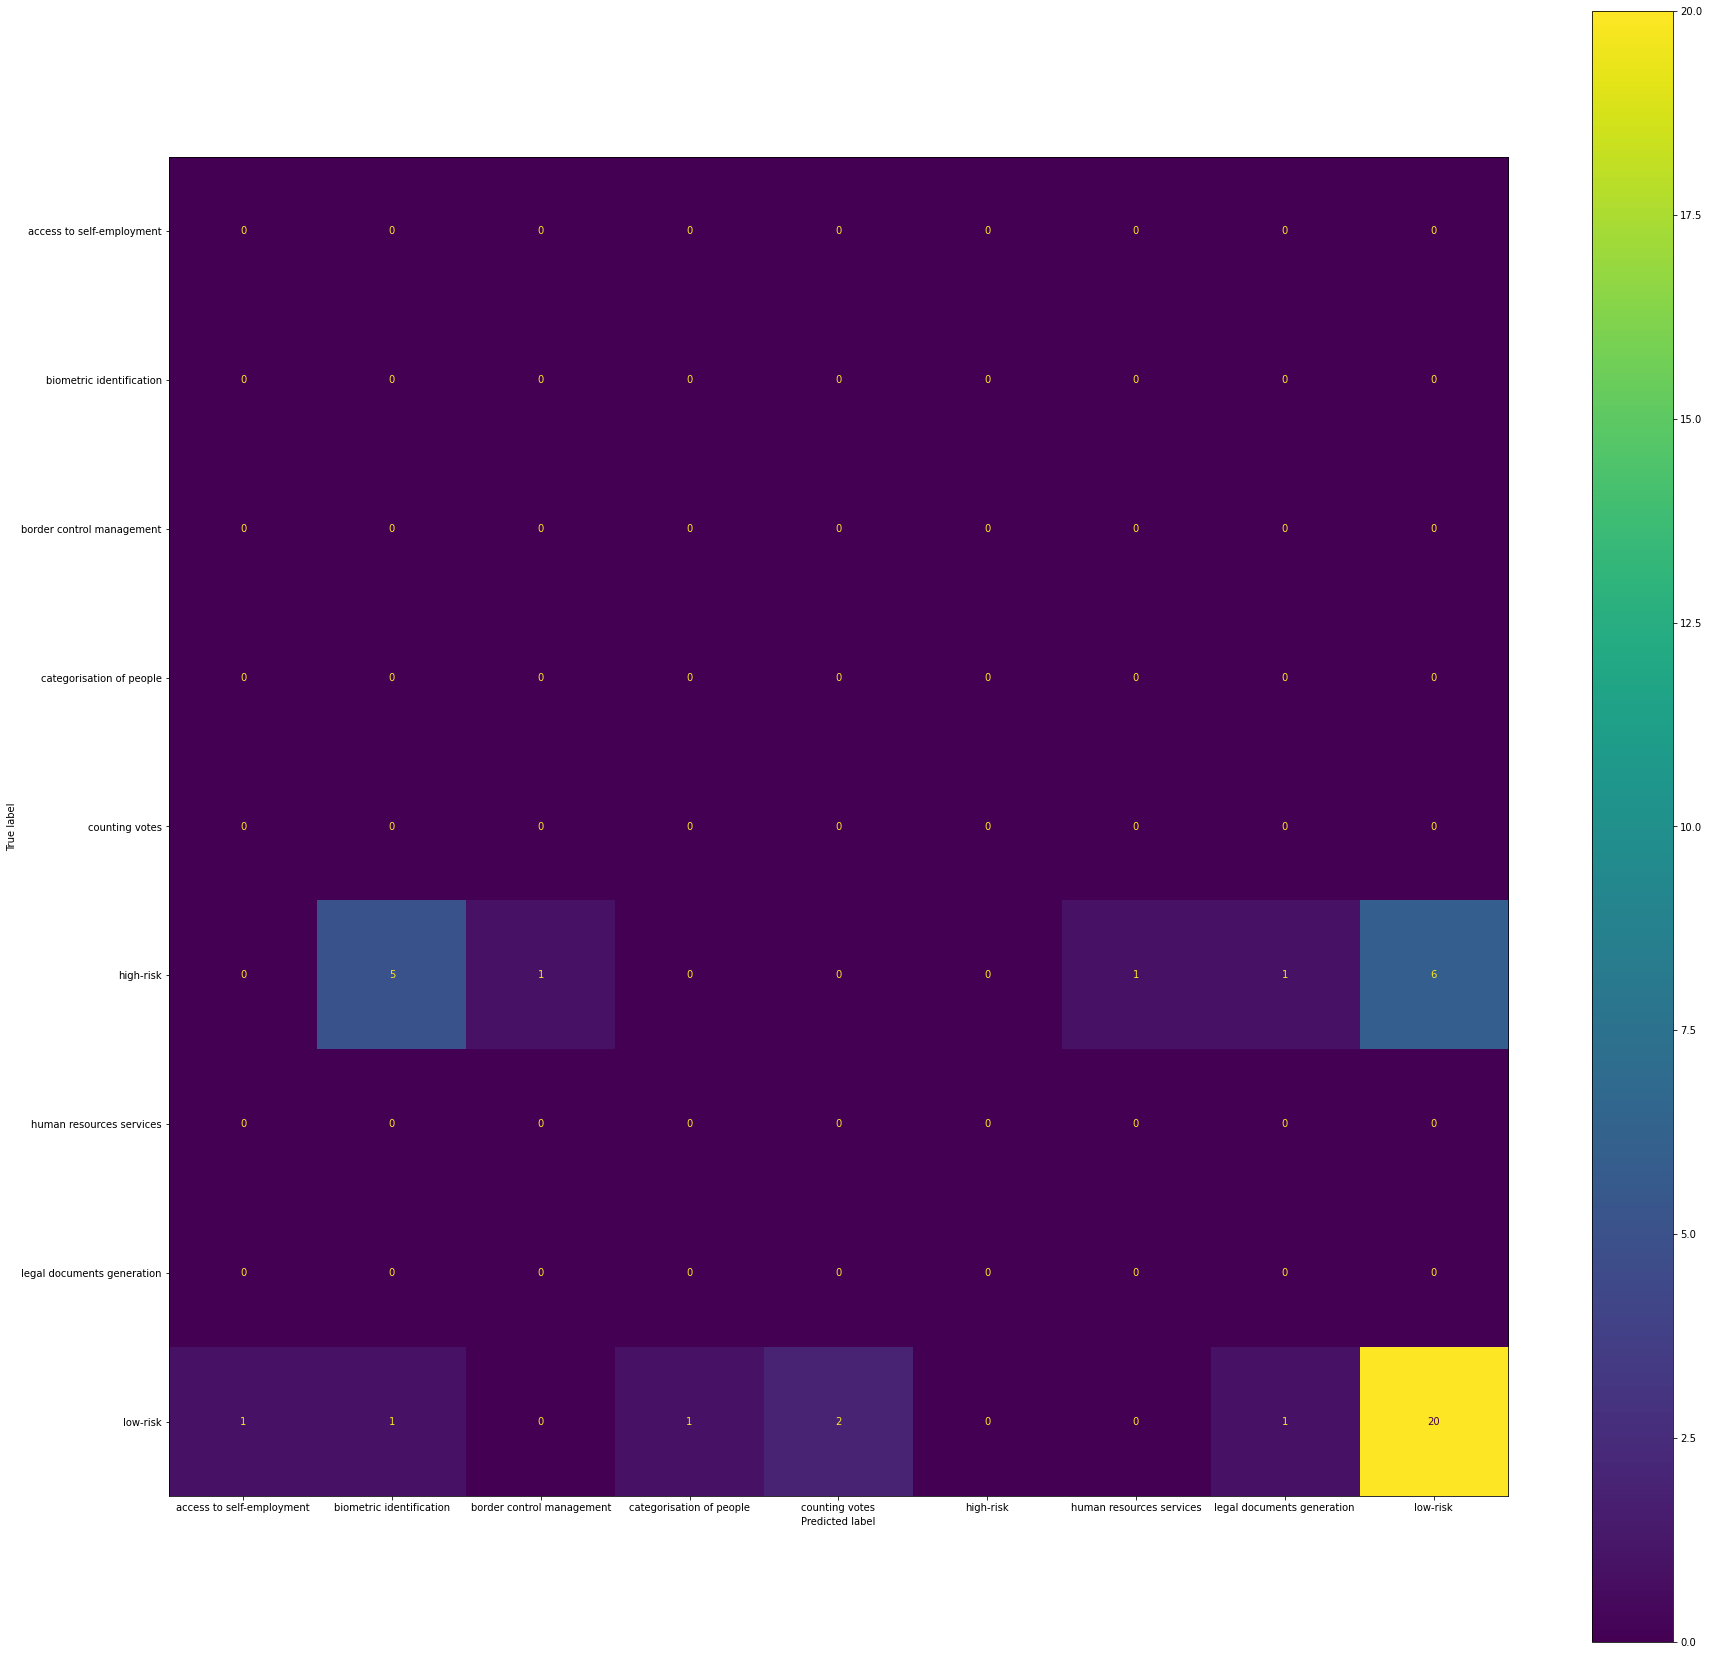

In [90]:
fig,ax = plt.subplots(figsize=(30,30))
plot_confusion_matrix(knn, embeddings_test, X_test["risk"].to_list() + ["high-risk" for _ in range(len(X_train[X_train["risk"] == "high-risk"]["desc"]))], ax=ax)

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score, get_scorer, make_scorer
scs = cross_val_score(knn, embeddings_cross, df["risk"], scoring=make_scorer(balanced_accuracy_score))
scs.mean()

0.5705882352941176

In [54]:
class CLF():
    def __init__():
        pass
    